In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv("/home/mind/projects/projects/gold_rate_prediction/1990-2021.csv", index_col=0)
df = df.loc[:, ['India(INR)']]
df = df.reset_index()
df = df[df.index % 3 == 2]
df = df.reset_index()
df = df.drop('index', axis = 1) # 1 for column and 0 for row
df.index = pd.to_datetime(df.Date, dayfirst=True)
df = df.drop('Date', axis = 1)
df

,India(INR)
Date,
1990-03-30,6334.4
1990-06-29,6140.5
1990-09-28,7333.1
1990-12-31,6948.9
1991-03-29,6942.2
...,...
2020-06-30,133498.2
2020-09-30,139215.5
2020-12-31,137922.2


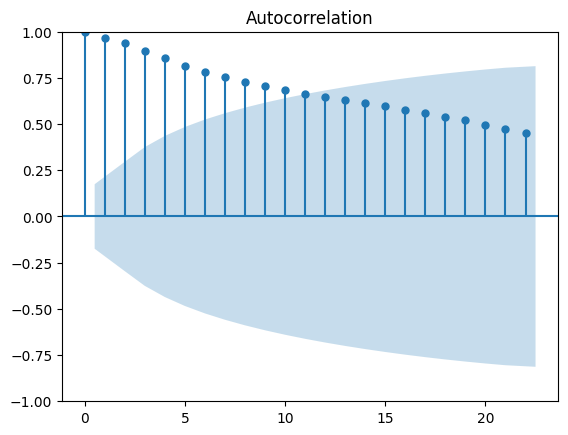

In [3]:
# ACF plot
plot_acf(df)
plt.show()

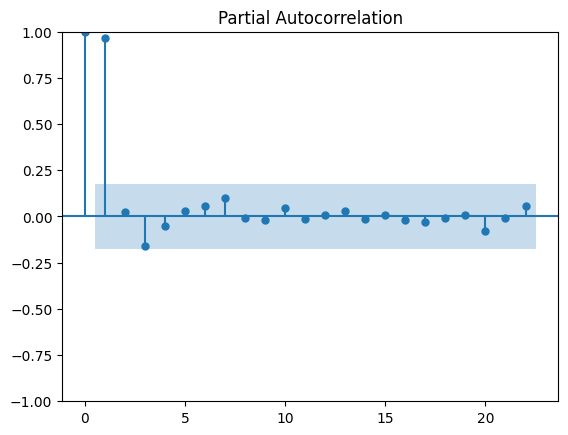

In [4]:
# PACF plot
plot_pacf(df)
plt.show()

In [5]:
sarima_model = SARIMAX(df.diff(),
                       order=(7, 0, 1),
                       seasonal_order=(8, 1, 8, 4),  
                       enforce_stationarity=False, 
                       validate_specification=False,
                       trend=[1, 1, 1])
model = sarima_model.fit(disp=False)

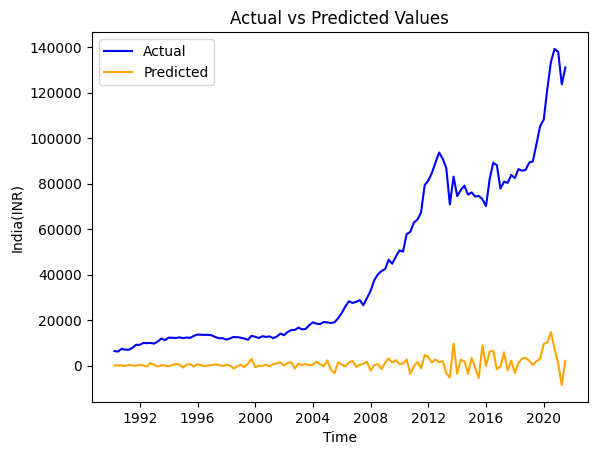

In [6]:
# Get the predicted values and confidence interval
pred = model.get_prediction(dynamic=False)

# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(pred.row_labels, pred.predicted_mean, label='Predicted', color='orange')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

In [7]:
time_steps = 20

y_pred = model.forecast(steps=time_steps)

y_pred_inr = np.array(y_pred)

y_pred_nonstat = []

cutoff_val = df['India(INR)'][-1]
prev = cutoff_val

for i in range(time_steps):
    curr = prev + y_pred[i]
    y_pred_nonstat.append(curr)
    prev = curr

print(y_pred_nonstat)

[142883.22595952073, 141221.91966969726, 148181.65483030994, 141275.29364009068, 159809.92246916704, 152852.5463912089, 142247.37440141937, 136003.0713436992, 134045.72249220524, 140708.16276002795, 150082.45664319093, 142663.4704804049, 143695.81094883455, 131802.74252392678, 136967.15615473164, 150137.56762571834, 140168.69058230196, 143465.3507430803, 153896.3148501842, 157937.51691585884]


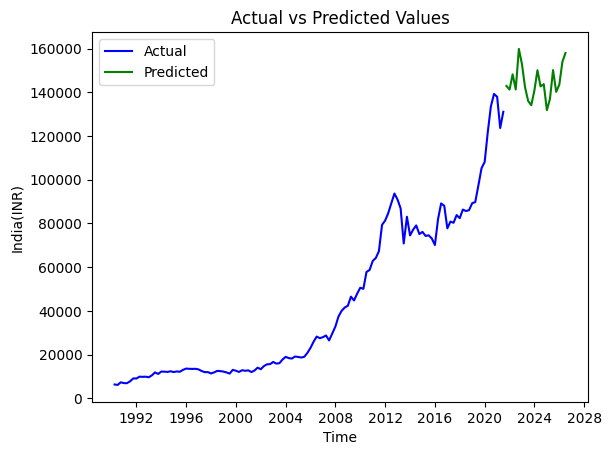

In [8]:
# Plot actual values
actual = df['India(INR)']
plt.plot(actual.index, actual, label='Actual', color='blue')

# Plot predicted values
plt.plot(y_pred.index, y_pred_nonstat, label='Predicted', color='green')

# Customize the plot
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('India(INR)')
plt.legend()
plt.show()

Hyperparameter tuning using for loop

36
seasonal_order: (8, 0, 0, 4)
seasonal_order: (8, 0, 1, 4)
seasonal_order: (8, 0, 2, 4)
seasonal_order: (8, 0, 3, 4)


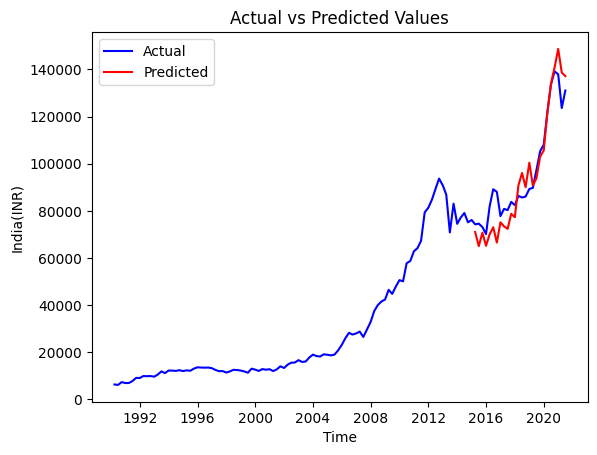

MAPE: 0.07274668321848882 for order = (8, 0, 3, 4)
seasonal_order: (8, 0, 4, 4)
seasonal_order: (8, 0, 5, 4)
seasonal_order: (8, 0, 6, 4)
seasonal_order: (8, 0, 7, 4)
seasonal_order: (8, 0, 8, 4)
seasonal_order: (8, 1, 0, 4)
seasonal_order: (8, 1, 1, 4)
seasonal_order: (8, 1, 2, 4)
seasonal_order: (8, 1, 3, 4)
seasonal_order: (8, 1, 4, 4)
seasonal_order: (8, 1, 5, 4)
seasonal_order: (8, 1, 6, 4)
seasonal_order: (8, 1, 7, 4)
seasonal_order: (8, 1, 8, 4)


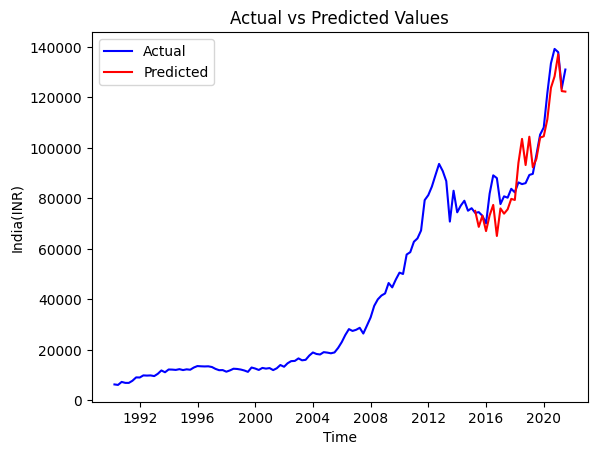

MAPE: 0.07064793169083991 for order = (8, 1, 8, 4)
seasonal_order: (9, 0, 0, 4)
seasonal_order: (9, 0, 1, 4)
seasonal_order: (9, 0, 2, 4)
seasonal_order: (9, 0, 3, 4)


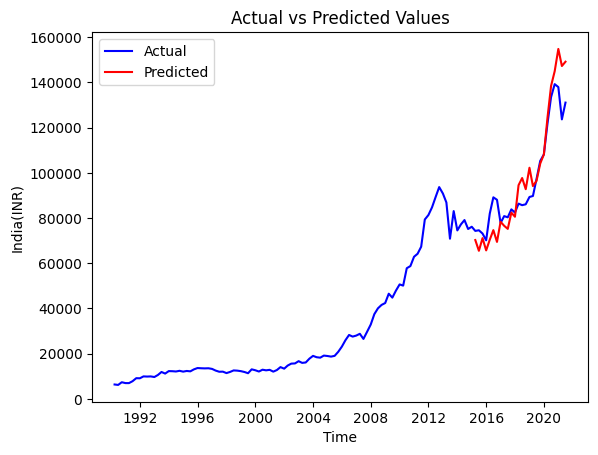

MAPE: 0.07781382239520541 for order = (9, 0, 3, 4)
seasonal_order: (9, 0, 4, 4)
seasonal_order: (9, 0, 5, 4)
seasonal_order: (9, 0, 6, 4)
seasonal_order: (9, 0, 7, 4)
seasonal_order: (9, 0, 8, 4)
seasonal_order: (9, 1, 0, 4)
seasonal_order: (9, 1, 1, 4)
seasonal_order: (9, 1, 2, 4)
seasonal_order: (9, 1, 3, 4)
seasonal_order: (9, 1, 4, 4)
seasonal_order: (9, 1, 5, 4)
seasonal_order: (9, 1, 6, 4)
seasonal_order: (9, 1, 7, 4)
seasonal_order: (9, 1, 8, 4)


In [9]:
P = range(8, 10)
Q = range(0, 9)
D = range(0, 2)
m = range(4, 5)

pdq_combinations = list(itertools.product(P, D, Q, m))
print(len(pdq_combinations))

train_length = 100
test_length = len(df) - train_length

training_data = df['India(INR)'][:train_length]

for seasonal_order in pdq_combinations:

    print(f'seasonal_order: {seasonal_order}')

    sarima_model = SARIMAX(training_data.diff(),
                           order=(7, 0, 1),
                           seasonal_order=seasonal_order,  
                           enforce_stationarity=False, 
                           validate_specification=False,
                           trend=[1, 1, 1])
    model = sarima_model.fit(disp=False)
    # print(model.summary())

    y_test_pred = model.forecast(steps=test_length)
    # print(y_test_pred)
    y_test_pred_inr = np.array(y_test_pred)

    y_test_pred_nonstat = []

    cutoff_val = df['India(INR)'][train_length]
    prev = cutoff_val

    for i in range(test_length):
        curr = prev + y_test_pred[i]
        y_test_pred_nonstat.append(curr)
        prev = curr

    # print(y_test_pred_nonstat)
        
    y_test = df['India(INR)'][train_length:]

    mape = np.mean(np.abs(y_test_pred_nonstat-y_test)/np.abs(y_test)) # mean absolute percentage error

    if mape <= 0.08:

        # Plot actual values
        actual = df['India(INR)']
        plt.plot(actual.index, actual, label='Actual', color='blue')

        # Plot predicted values
        plt.plot(y_test_pred.index, y_test_pred_nonstat, label='Predicted', color='red')

        # Customize the plot
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Time')
        plt.ylabel('India(INR)')
        plt.legend()
        plt.show()

        print(f'MAPE: {mape} for order = {seasonal_order}')